## Ex1: Classification Animal

In [1]:
#Doc du lieu
data <- read.csv("Chapter 18-19\\zoo.data.txt", header = FALSE)
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [2]:
#Xem thong tin
print(tail(data))
print(paste("No rows: ", nrow(data)))
print(paste("No columns: ", ncol(data)))
print(summary(data))

         V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18
96  vulture  0  1  1  0  1  0  1  0   1   1   0   0   2   1   0   1   2
97  wallaby  1  0  0  1  0  0  0  1   1   1   0   0   2   1   0   1   1
98     wasp  1  0  1  0  1  0  0  0   0   1   1   0   6   0   0   0   6
99     wolf  1  0  0  1  0  0  1  1   1   1   0   0   4   1   0   1   1
100    worm  0  0  1  0  0  0  0  0   0   1   0   0   0   0   0   0   7
101    wren  0  1  1  0  1  0  0  0   1   1   0   0   2   1   0   0   2
[1] "No rows:  101"
[1] "No columns:  18"
        V1           V2               V3              V4        
 frog    : 2   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 aardvark: 1   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 antelope: 1   Median :0.0000   Median :0.000   Median :1.0000  
 bass    : 1   Mean   :0.4257   Mean   :0.198   Mean   :0.5842  
 bear    : 1   3rd Qu.:1.0000   3rd Qu.:0.000   3rd Qu.:1.0000  
 boar    : 1   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  

In [3]:
str(data)

'data.frame':	101 obs. of  18 variables:
 $ V1 : Factor w/ 100 levels "aardvark","antelope",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ V2 : int  1 1 0 1 1 1 1 0 0 1 ...
 $ V3 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V4 : int  0 0 1 0 0 0 0 1 1 0 ...
 $ V5 : int  1 1 0 1 1 1 1 0 0 1 ...
 $ V6 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V7 : int  0 0 1 0 0 0 0 1 1 0 ...
 $ V8 : int  1 0 1 1 1 0 0 0 1 0 ...
 $ V9 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ V10: int  1 1 1 1 1 1 1 1 1 1 ...
 $ V11: int  1 1 0 1 1 1 1 0 0 1 ...
 $ V12: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V13: int  0 0 1 0 0 0 0 1 1 0 ...
 $ V14: int  4 4 0 4 4 4 4 0 0 4 ...
 $ V15: int  0 1 1 0 1 1 1 1 1 0 ...
 $ V16: int  0 0 0 0 0 0 1 1 0 1 ...
 $ V17: int  1 1 0 1 1 1 1 0 0 0 ...
 $ V18: int  1 1 4 1 1 1 1 4 4 1 ...


In [4]:
#Bo cot ten animal
data <- subset(data, select = -V1)
print(head(data))

  V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18
1  1  0  0  1  0  0  1  1   1   1   0   0   4   0   0   1   1
2  1  0  0  1  0  0  0  1   1   1   0   0   4   1   0   1   1
3  0  0  1  0  0  1  1  1   1   0   0   1   0   1   0   0   4
4  1  0  0  1  0  0  1  1   1   1   0   0   4   0   0   1   1
5  1  0  0  1  0  0  1  1   1   1   0   0   4   1   0   1   1
6  1  0  0  1  0  0  0  1   1   1   0   0   4   1   0   1   1


In [5]:
#Tao tao traing & test
#set.seed(42) # giu lai bo du lieu lan dau tao khi chay lai nhieu lan
trainingRowindex <- sample(1:nrow(data),  size = 0.75*nrow(data))#row indicate for train data, replace= FALSE khong co bo mau nao trung voi bo mau nao
print("select train row index")
print(trainingRowindex) 
trainingdata <- data[trainingRowindex,] #train data
testdata <- data[-trainingRowindex,] #train data
print("Rows of train data and test data:")
print(nrow(trainingdata))
print(nrow(testdata))

[1] "select train row index"
 [1]  95  11  15  61  89   7  64  39  84  86  74  41  80 101  62  45  16   3  69
[20]  79  10  31  57   4  59  37  18  26  50  48  32  96  91  27  52  47  19   1
[39]  56  25  28  44  40  30  82  51  49  12  66   8  20  35  24  92  33  77  13
[58]  23  36   6   2   9  38  83  67  98  60  75  54  97  22  65  53  63  87
[1] "Rows of train data and test data:"
[1] 75
[1] 26


In [6]:
library(rpart)

Warning message:
"package 'rpart' was built under R version 3.6.3"

In [7]:
#build model
data.tree <- rpart(V18 ~ ., data = trainingdata, method = 'class', minbucket = 1)
print(data.tree)

n= 75 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 75 45 1 (0.4 0.17 0.053 0.16 0.04 0.093 0.08)  
    2) V5>=0.5 30  0 1 (1 0 0 0 0 0 0) *
    3) V5< 0.5 45 32 2 (0 0.29 0.089 0.27 0.067 0.16 0.13)  
      6) V3>=0.5 13  0 2 (0 1 0 0 0 0 0) *
      7) V3< 0.5 32 20 4 (0 0 0.12 0.38 0.094 0.22 0.19)  
       14) V13>=0.5 12  0 4 (0 0 0 1 0 0 0) *
       15) V13< 0.5 20 13 6 (0 0 0.2 0 0.15 0.35 0.3)  
         30) V10>=0.5 7  3 3 (0 0 0.57 0 0.43 0 0)  
           60) V7< 0.5 3  0 3 (0 0 1 0 0 0 0) *
           61) V7>=0.5 4  1 5 (0 0 0.25 0 0.75 0 0)  
            122) V4< 0.5 1  0 3 (0 0 1 0 0 0 0) *
            123) V4>=0.5 3  0 5 (0 0 0 0 1 0 0) *
         31) V10< 0.5 13  6 6 (0 0 0 0 0 0.54 0.46)  
           62) V7< 0.5 8  1 6 (0 0 0 0 0 0.88 0.12)  
            124) V14>=3 7  0 6 (0 0 0 0 0 1 0) *
            125) V14< 3 1  0 7 (0 0 0 0 0 0 1) *
           63) V7>=0.5 5  0 7 (0 0 0 0 0 0 1) *


In [8]:
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

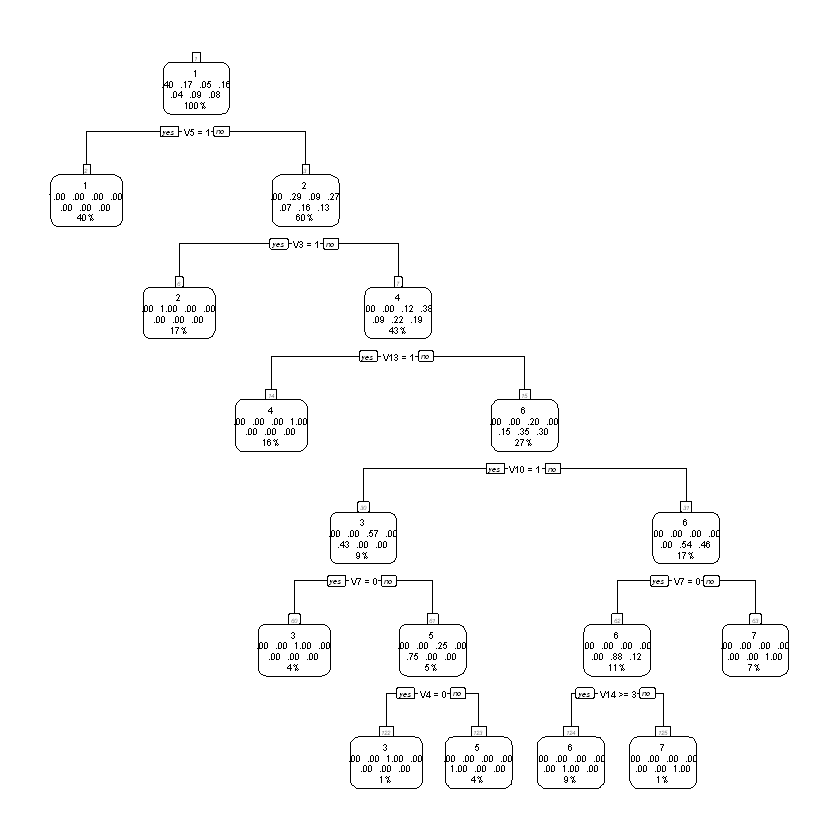

In [9]:
#Visualize
prp(data.tree, type = 2, extra = "auto", nn = TRUE, branch = 1, varlen = 0, yesno = 2)

In [10]:
#test model
pred_new = predict(data.tree, testdata, type = "class")

In [11]:
print("Predict vs Actual:")
result <- data.frame(Predict = pred_new, Actual = testdata$V18)
print(result)

[1] "Predict vs Actual:"
    Predict Actual
5         1      1
14        7      7
17        2      2
21        2      2
29        1      1
34        2      2
42        2      2
43        6      6
46        1      1
55        1      1
58        2      2
68        1      1
70        1      1
71        1      1
72        2      2
73        6      7
76        1      1
78        7      7
81        3      3
85        1      1
88        2      2
90        5      5
93        4      4
94        1      1
99        1      1
100       7      7


In [12]:
misClassificError <- mean(pred_new != testdata$V18)
print(paste("Accuracy 2:", 1 - misClassificError))

[1] "Accuracy 2: 0.961538461538462"


In [14]:
#Predict new data
newdata = data.frame(V2 = c(1,1),
                    V3 = c(0,0),
                    V4 = c(0,1),
                    V5 = c(1,0),
                    V6 = c(0,1),
                    V7 = c(0,0),
                    V8 = c(1,0),
                    V9 = c(1,0),
                    V10 = c(1,0),
                    V11 = c(0,1),
                    V12 = c(0,1),
                    V13 = c(0,0),
                    V14 = c(4,6),
                    V15 = c(0,0),
                    V16 = c(0,0),
                    V17 = c(1,0))

In [15]:
pred_new = predict(data.tree, newdata, type = "class")
print("New predictions:")
print(pred_new)

[1] "New predictions:"
1 2 
1 6 
Levels: 1 2 3 4 5 6 7


## Ex2: Baseball
##### Áp dụng Decision Tree để dự đoán cân nặng dựa trên chiều cao

In [17]:
data <- read.csv("Chapter 18-19\\baseball.csv")
print(head(data))

             Name Team       Position Height Weight   Age PosCategory
1   Adam_Donachie  BAL        Catcher     74    180 22.99     Catcher
2       Paul_Bako  BAL        Catcher     74    215 34.69     Catcher
3 Ramon_Hernandez  BAL        Catcher     72    210 30.78     Catcher
4    Kevin_Millar  BAL  First_Baseman     72    210 35.43   Infielder
5     Chris_Gomez  BAL  First_Baseman     73    188 35.71   Infielder
6   Brian_Roberts  BAL Second_Baseman     69    176 29.39   Infielder


In [18]:
#Xem thong tin summary, so dong, so cot, str
print(paste("No rows of data is ", nrow(data)))
print(paste("No columns of data is ", ncol(data)))
print("Summary is ")
print(summary(data))

[1] "No rows of data is  1015"
[1] "No columns of data is  7"
[1] "Summary is "
              Name           Team                 Position       Height     
 Chris_Young    :   2   NYM    : 38   Relief_Pitcher  :315   Min.   :67.00  
 Tony_Pe?a      :   2   ATL    : 37   Starting_Pitcher:220   1st Qu.:72.00  
 A.J._Burnett   :   1   CHC    : 36   Outfielder      :194   Median :74.00  
 A.J._Murray    :   1   DET    : 36   Catcher         : 76   Mean   :73.69  
 A.J._Pierzynski:   1   OAK    : 36   Second_Baseman  : 58   3rd Qu.:75.00  
 Aaron_Boone    :   1   WAS    : 36   First_Baseman   : 55   Max.   :83.00  
 (Other)        :1007   (Other):796   (Other)         : 97                  
     Weight           Age            PosCategory 
 Min.   :150.0   Min.   :20.90   Catcher   : 76  
 1st Qu.:186.0   1st Qu.:25.41   Infielder :210  
 Median :200.0   Median :27.90   Outfielder:194  
 Mean   :201.3   Mean   :28.71   Pitcher   :535  
 3rd Qu.:215.0   3rd Qu.:31.19                   
 Max

In [19]:
str(data)

'data.frame':	1015 obs. of  7 variables:
 $ Name       : Factor w/ 1013 levels "A.J._Burnett",..: 13 778 801 615 199 134 717 703 66 22 ...
 $ Team       : Factor w/ 30 levels "ANA","ARZ","ATL",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Position   : Factor w/ 8 levels "Catcher","First_Baseman",..: 1 1 1 2 2 5 6 8 8 3 ...
 $ Height     : int  74 74 72 72 73 69 69 71 76 71 ...
 $ Weight     : int  180 215 210 210 188 176 209 200 231 180 ...
 $ Age        : num  23 34.7 30.8 35.4 35.7 ...
 $ PosCategory: Factor w/ 4 levels "Catcher","Infielder",..: 1 1 1 2 2 2 2 2 2 3 ...


In [20]:
baseball <- data[c("Height","Weight")]
head(baseball)

Height,Weight
74,180
74,215
72,210
72,210
73,188
69,176


In [21]:
#Update lai thong tin chieu cao va can nang
baseball["Height"] <- baseball["Height"]*0.0254
baseball["Weight"] <- baseball["Weight"]*0.453592
print("Data after updating is : ")
print(head(baseball))

[1] "Data after updating is : "
  Height   Weight
1 1.8796 81.64656
2 1.8796 97.52228
3 1.8288 95.25432
4 1.8288 95.25432
5 1.8542 85.27530
6 1.7526 79.83219


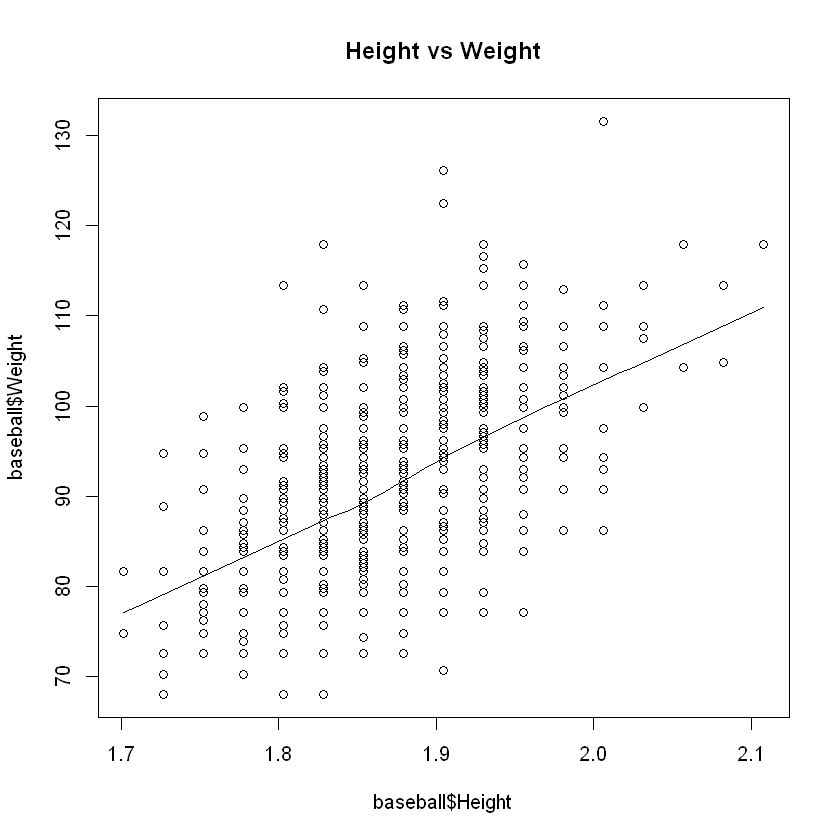

In [22]:
#ve bieu do bieu dien moi quan he input va output(scatter plot)
scatter.smooth(x= baseball$Height, y = baseball$Weight, main = "Height vs Weight")

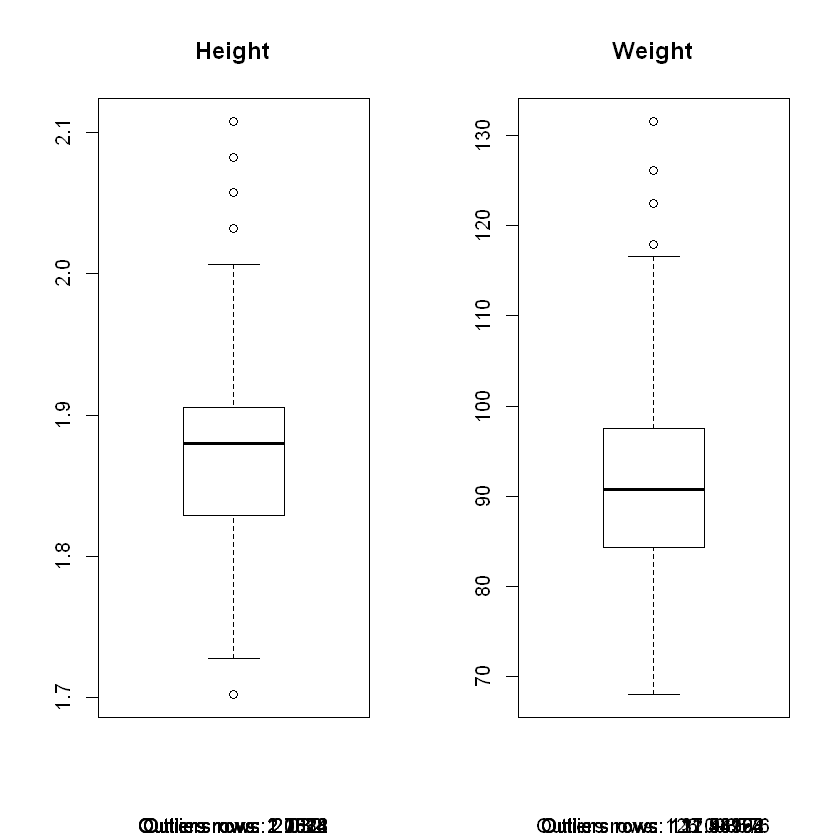

In [23]:
#Kiem tra outliers
par(mfrow = c(1,2) ) #divide graph area in 2 columns
boxplot(baseball$Height, main = "Height",
       sub = paste("Outliers rows:", boxplot.stats(baseball$Height)$out))
boxplot(baseball$Weight, main = "Weight",
       sub = paste("Outliers rows:", boxplot.stats(baseball$Weight)$out))

In [24]:
#Loai bo outliers
ht_outliers <- boxplot.stats(baseball$Height)$out
print("ht_outliers: ")
print(ht_outliers)
print(paste("Numrows: ", sum(baseball$Height == ht_outliers[1])))

[1] "ht_outliers: "
 [1] 2.0574 2.0320 2.0320 2.0320 2.0320 2.0828 2.0320 2.0574 2.0828 2.1082
[11] 1.7018 1.7018
[1] "Numrows:  2"


In [25]:
wt_outliers <- boxplot.stats(baseball$Weight)$out
print("wt_outliers: ")
print(wt_outliers)
print(paste("Numrows: ", sum(baseball$Weight == wt_outliers[1])))

[1] "wt_outliers: "
[1] 117.9339 122.4698 131.5417 126.0986 117.9339 117.9339 117.9339
[1] "Numrows:  4"


In [26]:
#Drop rows have outliers
print(paste("Befor drop:", nrow(baseball)))
for (record in ht_outliers) {
    baseball <- baseball[baseball$Height != record,]
}
for (record in wt_outliers) {
    baseball <- baseball[baseball$Weight != record,]
}
print(paste("After drop:", nrow(baseball)))

[1] "Befor drop: 1015"
[1] "After drop: 998"


In [27]:
#tao train test voi ti le 70 30
set.seed(42) # giu lai bo du lieu lan dau tao khi chay lai nhieu lan
trainingRowindex <- sample(1:nrow(baseball), 0.7*nrow(baseball))#row indicate for train data
print("select train row index")
print(trainingRowindex[1:10]) 
trainingdata <- baseball[trainingRowindex,] #train data
testdata <- baseball[-trainingRowindex,] #train data
print("Rows of train data and test data:")
print(nrow(trainingdata))
print(nrow(testdata))

[1] "select train row index"
 [1] 561 997 321 153  74 228 146 634  49 128
[1] "Rows of train data and test data:"
[1] 698
[1] 300


In [28]:
#build model
baseball.tree <- rpart(Weight~Height, data = trainingdata, method = "anova")
print(summary(baseball.tree))

Call:
rpart(formula = Weight ~ Height, data = trainingdata, method = "anova")
  n= 698 

          CP nsplit rel error    xerror       xstd
1 0.15717992      0 1.0000000 1.0032151 0.04888121
2 0.02896649      1 0.8428201 0.8747585 0.04657139
3 0.02483727      2 0.8138536 0.8720701 0.04630771
4 0.01126342      3 0.7890163 0.8338157 0.04438520
5 0.01000000      4 0.7777529 0.8290693 0.04417677

Variable importance
Height 
   100 

Node number 1: 698 observations,    complexity param=0.1571799
  mean=90.84057, MSE=80.12391 
  left son=2 (340 obs) right son=3 (358 obs)
  Primary splits:
      Height < 1.8669 to the left,  improve=0.1571799, (0 missing)

Node number 2: 340 observations,    complexity param=0.02483727
  mean=87.19906, MSE=62.91233 
  left son=4 (223 obs) right son=5 (117 obs)
  Primary splits:
      Height < 1.8415 to the left,  improve=0.06493916, (0 missing)

Node number 3: 358 observations,    complexity param=0.02896649
  mean=94.29899, MSE=71.91557 
  left son=6 (226 ob

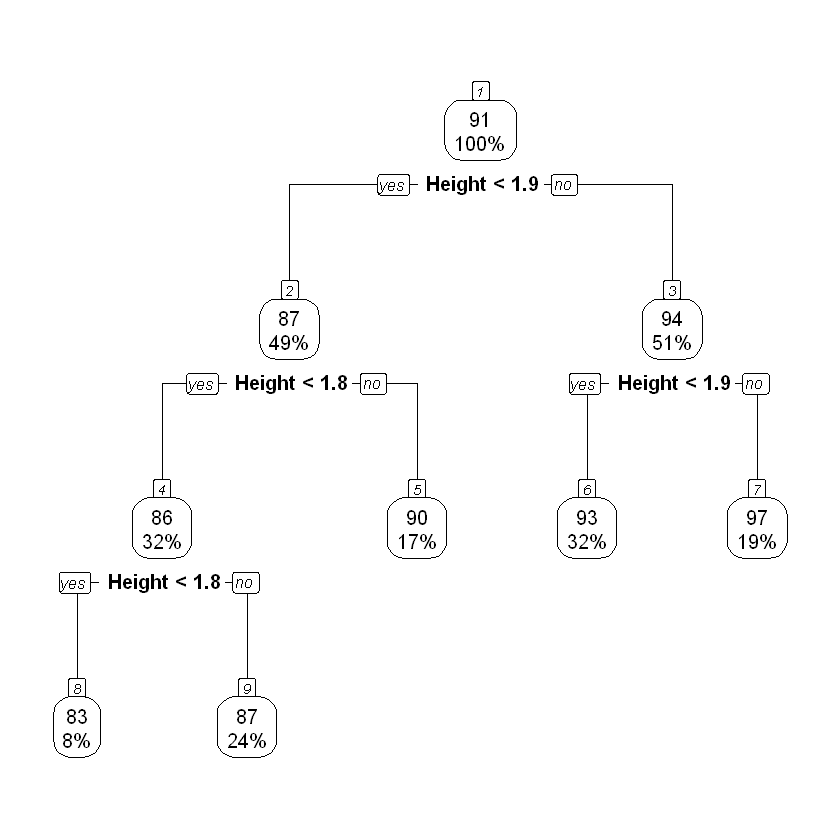

In [29]:
#draw tree
prp(baseball.tree, type = 2, extra = "auto", nn = TRUE, branch = 1, varlen = 0, yesno = 2)

In [30]:
#test model
pred_new = predict(baseball.tree, testdata, type = "vector")

In [31]:
#mean square error
mse_Test = mean((testdata$Weight - pred_new)^2)
print(paste("mse in test:", mse_Test))

[1] "mse in test: 57.8497168055646"


In [32]:
#new predictions
x <- c(1.775, 1.825, 1.925)
y1 <- predict(baseball.tree, data.frame(Height = x), type = "vector")
print(y1)

       1        2        3 
82.72491 86.67343 97.08243 
